# MOVIE SENTIMENT ANALYSIS

In this project we are going to do a twitter sentiment analysis on a new bollywood movie Gully Boy.<br>
The goal of the project is to view the sentiments of audience for the movie on its release date.<br>
Through the analysis we can come to conclusion whether the movie is worth a watch or no. 


importing all the required libraries

In [9]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
ck= 'tZLjnEW3QbBYODXgQGUe0w28i'
cs= 'kZ4UpJWs5y98fmWwO45PhnYkY6LjRcG8p5MYn3Uham3UCvDbMb'
at= '86694879-YIxf3atu8syNm3mbE2PQ8uUdkTzBrC8xHcKAFDDED'
ats= '6sagcyQj1TGXGMX8xrl6gBfg5MJ4yk72pH8vQoDnBkPQi'

In [11]:
 #API's setup:
def twitter_setup():
    #"""
    #Utility function to setup the Twitter's API
    #with our access keys provided.
    #"""
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(ck, cs)
    auth.set_access_token(at, ats)


    # Return API with authentication:

    api = tweepy.API(auth,wait_on_rate_limit = True)
    return api

In [12]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="kamaalrkhan", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
#("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

Only Muqaabla Karega? No attack? Why? You said that Manmohan Singh is weak PM. But you have 56” chest, So you will… https://t.co/rXyZmWFJX1

My review of #GullyBoy! https://t.co/O9PldefHWg

RT @KRKBoxOffice: Day1 business of Film #GullyBoy at multiplexes!
#PVR- ₹5.10Cr! Which is 28.33% of All India business!
#Inox- ₹3.80Cr! Whi…

Now Anupama Chopra also wants to become KRK, So she did review of #GullyBoy in Hindi. And believe me, only 5 thousa… https://t.co/GYmBk7nnAq

अपनी फतेह पर अगर तुझे गरूर आने लगे, तो चुपके से मिट्टी से पूछ लेना, कि आजकल सिकन्दर कहाँ है!! Good morning!!



In [13]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,Only Muqaabla Karega? No attack? Why? You said...
1,My review of #GullyBoy! https://t.co/O9PldefHWg
2,RT @KRKBoxOffice: Day1 business of Film #Gully...
3,"Now Anupama Chopra also wants to become KRK, S..."
4,"अपनी फतेह पर अगर तुझे गरूर आने लगे, तो चुपके स..."
5,RT @KRKBoxOffice: Ranbir Kapoor-Sanjay Dutt's ...
6,RT @BollywoodKiNews: Salman Khan- Katrina Kaif...
7,RT @SushantBSinha: #Pulwama में #CRPF के जवानो...
8,Deeply saddened and angered for the terrorist ...
9,Gully Boy - Public Review | KRK Box Office htt...


In [42]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [43]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1096272885046525952
2019-02-15 04:59:58
Twitter for iPhone
64
6
None
None
{'hashtags': [{'text': 'GullyBoy', 'indices': [13, 22]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/O9PldefHWg', 'expanded_url': 'https://www.youtube.com/watch?v=lALZDIiyPX4', 'display_url': 'youtube.com/watch?v=lALZDI…', 'indices': [24, 47]}]}


In [44]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [45]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,My review of #GullyBoy! https://t.co/O9PldefHWg,47,1096272885046525952,2019-02-15 04:59:58,Twitter for iPhone,64,6
1,RT @KRKBoxOffice: Day1 business of Film #Gully...,140,1096269689225969664,2019-02-15 04:47:16,Twitter for iPhone,0,10
2,"Now Anupama Chopra also wants to become KRK, S...",140,1096231550876672001,2019-02-15 02:15:43,Twitter for iPhone,611,34
3,"अपनी फतेह पर अगर तुझे गरूर आने लगे, तो चुपके स...",108,1096221444177100801,2019-02-15 01:35:33,Twitter for iPhone,298,36
4,RT @KRKBoxOffice: Ranbir Kapoor-Sanjay Dutt's ...,91,1096093848604950528,2019-02-14 17:08:32,Twitter for iPhone,0,6
5,RT @BollywoodKiNews: Salman Khan- Katrina Kaif...,134,1096093667549478913,2019-02-14 17:07:49,Twitter for iPhone,0,8
6,RT @SushantBSinha: #Pulwama में #CRPF के जवानो...,139,1096058984828678144,2019-02-14 14:50:00,Twitter for iPhone,0,3004
7,Deeply saddened and angered for the terrorist ...,140,1096031788563079169,2019-02-14 13:01:56,Twitter for iPhone,1026,112
8,Gully Boy - Public Review | KRK Box Office htt...,79,1096014250244485121,2019-02-14 11:52:14,Twitter for iPhone,93,7
9,My review of film #GullyBoy! Watch and RT for ...,90,1096009078093037569,2019-02-14 11:31:41,Twitter for iPhone,104,12


In [46]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 114.21


In [47]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Film #Manikarnika is 50 times better than #Bahubali So actually it should do ₹500Cr business in India. Now let’s se… https://t.co/z5LdJIsVnK
Number of likes: 3145
140 characters.

The tweet with more retweets is: 
RT @SushantBSinha: #Pulwama में #CRPF के जवानों पर हुए आतंकी हमले में इस्तेमाल न तो कार पाकिस्तान से आई होगी और न ही इस्तेमाल हुआ करीब 200…
Number of retweets: 3004
139 characters.



In [48]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

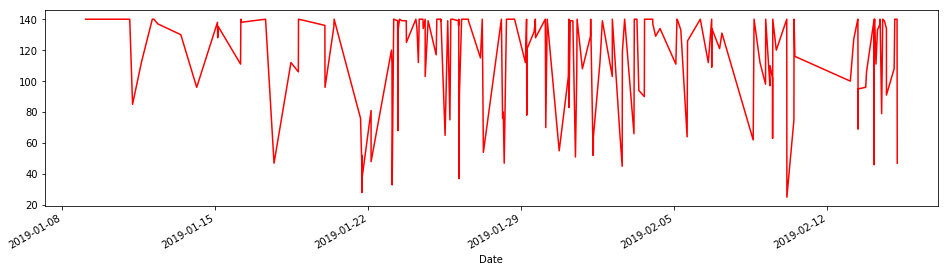

In [49]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

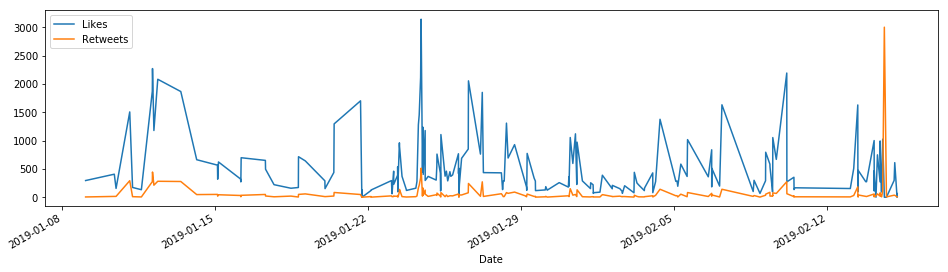

In [50]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [51]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* TikTok-a video community


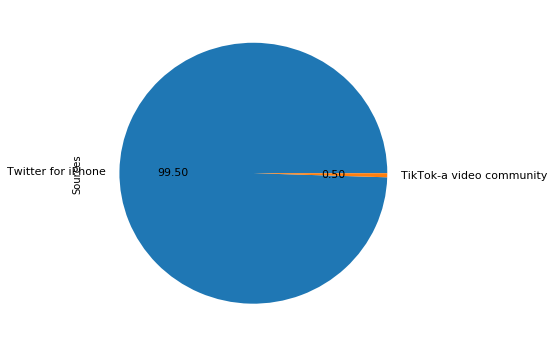

In [52]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [53]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [54]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,My review of #GullyBoy! https://t.co/O9PldefHWg,47,1096272885046525952,2019-02-15 04:59:58,Twitter for iPhone,64,6,0
1,RT @KRKBoxOffice: Day1 business of Film #Gully...,140,1096269689225969664,2019-02-15 04:47:16,Twitter for iPhone,0,10,0
2,"Now Anupama Chopra also wants to become KRK, S...",140,1096231550876672001,2019-02-15 02:15:43,Twitter for iPhone,611,34,1
3,"अपनी फतेह पर अगर तुझे गरूर आने लगे, तो चुपके स...",108,1096221444177100801,2019-02-15 01:35:33,Twitter for iPhone,298,36,1
4,RT @KRKBoxOffice: Ranbir Kapoor-Sanjay Dutt's ...,91,1096093848604950528,2019-02-14 17:08:32,Twitter for iPhone,0,6,0
5,RT @BollywoodKiNews: Salman Khan- Katrina Kaif...,134,1096093667549478913,2019-02-14 17:07:49,Twitter for iPhone,0,8,1
6,RT @SushantBSinha: #Pulwama में #CRPF के जवानो...,139,1096058984828678144,2019-02-14 14:50:00,Twitter for iPhone,0,3004,0
7,Deeply saddened and angered for the terrorist ...,140,1096031788563079169,2019-02-14 13:01:56,Twitter for iPhone,1026,112,-1
8,Gully Boy - Public Review | KRK Box Office htt...,79,1096014250244485121,2019-02-14 11:52:14,Twitter for iPhone,93,7,0
9,My review of film #GullyBoy! Watch and RT for ...,90,1096009078093037569,2019-02-14 11:31:41,Twitter for iPhone,104,12,0


In [55]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [56]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 49.0%
Percentage of neutral tweets: 39.0%
Percentage de negative tweets: 12.0%


Through the above analysis we can conclude that the audience sentiments are mostly positive and neutral but less neagtive.<br>
So the movie may be worth a watch.